<a href="https://colab.research.google.com/github/Madumali-Prasad/Madumali-Prasad/blob/main/Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tweet Sentiment Analysis



### Import Required Libraries

     




In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import joblib
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Reading the data

In [ ]:
df= pd.read_excel("/content/Tweets_Final_Data sheet.xlsx")
print(f"There are of {df.shape[0]} Tweets")
print(f"There are {df.shape[1]} columns namely {list(df.columns)}")

There are of 2990 Tweets
There are 3 columns namely ['Date and Time', 'Content', 'Status']


In [ ]:
#Random Sample of dataset
df.sample(frac=0.005)


,Date and Time,Content,Status
1946,2021-10-20 17:22:26+00:00,EU says N Ireland trade talks with UK must con...,Positive
1368,2021-12-14 20:36:18+00:00,Ireland GDP and Economic Data,positive
730,2022-01-27 23:25:10+00:00,Unemployment Rate Soars in Iceland,Negative
2056,2021-06-14 09:15:58+00:00,Eurozone business activity picks up despite su...,Positive
765,2022-01-27 23:18:33+00:00,North Macedonia and Albania set to begin EU ac...,Positive
81,2022-03-07 20:44:40+00:00,Lowest level since October an opportunity,Negative
118,2022-02-27 23:59:13+00:00,Hong Kong dock workers end strike,Positive
859,2022-01-27 23:00:02+00:00,EU in trade deal with Singapore,neutral
2041,2021-06-16 19:30:07+00:00,UK rejects US linking of steel tariffs and N I...,Positive
1139,2022-01-16 21:06:32+00:00,Big Central Bank Assets Jump Fastest in 5 Year...,Negative


In [ ]:
#Check duplicates 
print(f"Number of duplicate items {len(df)-len(df.drop_duplicates())}")

Number of duplicate items 0


In [ ]:
#Check null values in the dataset
print(df.isnull().sum())

Date and Time    0
Content          0
Status           0
dtype: int64


In [ ]:
#Remove the row with a null value
df=df.dropna()

In [ ]:
#Labels of the dataset
print(list(df["Status"].unique()))

['Neutral', 'Positive', 'Negative', 'neutral', 'negetive', 'positive', 'negative']


In [ ]:
#Add a numerical column
#0-Negative
#1-Neutral
#2-Positive
df2=df.copy()
score=[]
for idx,row in df2.iterrows():
    label=row["Status"].lower()
    if label=="negetive" or label=="negative":
        score.append(0)
    
    elif label=="nutral" or label=="neutral":
        score.append(1)
    
    elif label=="positive":
        score.append(2)
    
    else:
        print(label)

print(len(score),len(df2))
df2["Score"] = score 

#Convert Score column into categorical type
df2["Score"]=df2["Score"].astype("category")

2990 2990


In [ ]:
#The dataset with added new column
df2.sample(frac=0.005)

,Date and Time,Content,Status,Score
897,2022-01-27 22:50:56+00:00,Bank refrains from new stimulus,neutral,1
831,2022-01-27 23:04:09+00:00,US 'heading over fiscal cliff',positive,2
2731,2021-11-28 19:53:38+00:00,Household income 'being squeezed',neutral,1
1019,2022-01-27 22:32:03+00:00,Japanese data suggests recession,neutral,1
1322,2021-12-17 11:23:07+00:00,Fed minutes showed ‘many’ officials in favor o...,positive,2
1352,2021-12-15 20:31:35+00:00,Europe’s Room Rates Still Above 2019 Prices fo...,negetive,0
2230,2021-05-20 20:00:53+00:00,Are the BRIC Nations Cracking? - Businessweek.,neutral,1
2200,2021-05-26 18:47:30+00:00,Jobless Claims in U.S. Hovered Last Week Near ...,Positive,2
2757,2021-11-06 09:55:25+00:00,Final push towards US fiscal deal,neutral,1
1927,2021-10-22 02:54:04+00:00,Draghi staying on strengthens hand of EU fisca...,Negative,0


## Data Cleaning

In [ ]:
##Function 

stopwords_list = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
punctuations='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
lst=list(punctuations)

def remove_unwanted(review):
    splitReview = review.split()
    splitReview = [word for word in splitReview if not word in stopwords_list] #Remove unwanted words (a,the,for,----)
    splitReview = [lemmatizer.lemmatize(word) for word in splitReview]  #Change the tense of the word 
    splitReview = [porter_stemmer.stem(word) for word in splitReview]  #Remove stemming
    clean_review = ' '.join(splitReview)
    return clean_review

def clean_text(text):
    text=text.lower()
    for i in lst:
        text = text.replace(i,'')
    clean_text= remove_unwanted(text)
    return clean_text

In [ ]:
for idx,row in df2.iterrows():
    row["Content"]=clean_text(row["Content"])

In [ ]:
#The dataset after cleaning
df2.sample(frac=0.005)

,Date and Time,Content,Status,Score
550,2022-02-27 23:46:09+00:00,From a linear to a circular economy,Positive,2
2590,2022-02-24 23:03:12+00:00,Downside looks unabated,Neutral,1
639,2022-01-27 23:42:48+00:00,Eurozone economy slowed in second quarter,Negative,0
1252,2021-12-23 07:11:42+00:00,Ukraine cautious on Russian union,neutral,1
2957,2021-06-21 10:02:34+00:00,"In Booth event, experts discuss economic outlo...",neutral,1
2533,2022-03-28 19:11:26+00:00,Up to 13 Percent Unemployment Rate Forecast fo...,neutral,1
772,2022-01-27 23:17:26+00:00,European Commission recommends disciplinary ac...,Negative,0
2452,2021-04-08 20:43:36+00:00,Europe bank supervisor unlikely this year: Ger...,Negative,0
0,2022-03-20 18:34:02+00:00,EUR/USD now shifted its focus to 1.0810 ï¿½ UOB,Neutral,1
2875,2021-08-17 00:34:18+00:00,joncoopertweets If that tax is approved the US...,neutral,1


Text(0.5, 0.98, 'Histogram number of words in Tweets')

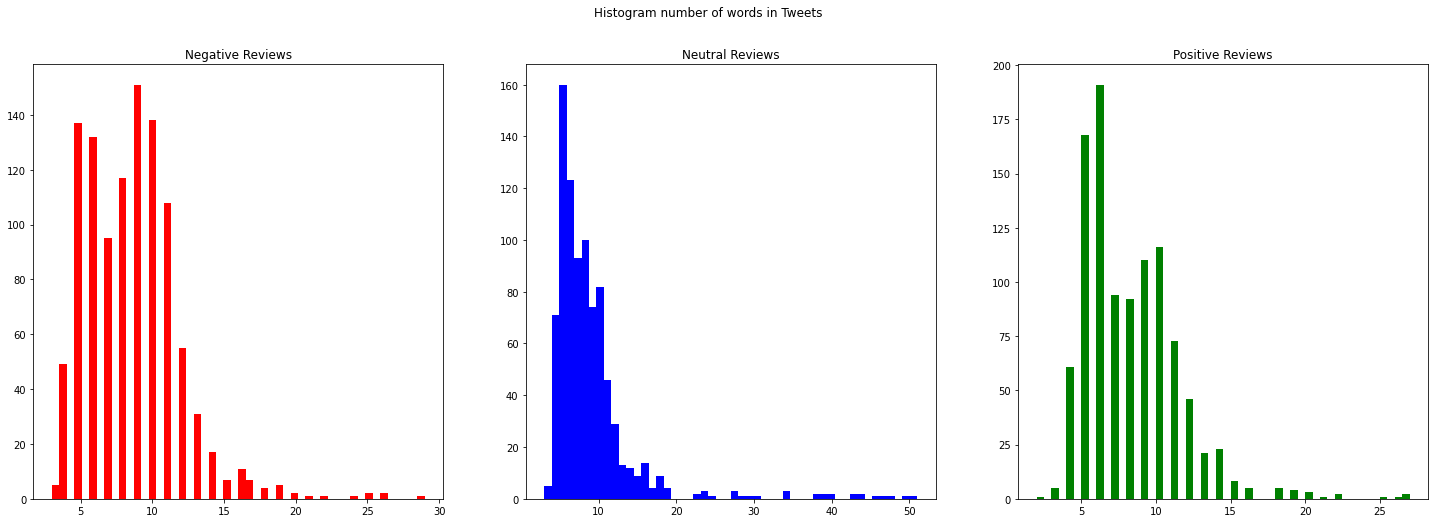

In [ ]:
from matplotlib import pyplot as plt
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(25,8))

ax1.hist(df2[df2['Score'] == 0]['Content'].str.split().map(lambda x: len(x)), bins=50, color='r')
ax1.set_title('Negative Reviews')

ax2.hist(df2[df2['Score'] == 1]['Content'].str.split().map(lambda x: len(x)), bins=50, color='b')
ax2.set_title("Neutral Reviews")

ax3.hist(df2[df2['Score'] == 2]['Content'].str.split().map(lambda x: len(x)), bins=50, color='g')
ax3.set_title('Positive Reviews')

f.suptitle('Histogram number of words in Tweets')

In [ ]:
def pie_chart(df):
    review_count=df.groupby(["Score"]).count()
    print(review_count["Content"])
    plt.figure(figsize=(8,8))
    plt.title('Tweet Count',fontsize=20)

    label=["Negative","Neutral","Positive"]
    plt.pie(list(review_count["Content"]),labels=label,shadow = True,autopct='%1.1f%%',textprops={'fontsize': 14})
    #plt.legend(loc='best')
    plt.show()

Score
0    1079
1     878
2    1033
Name: Content, dtype: int64


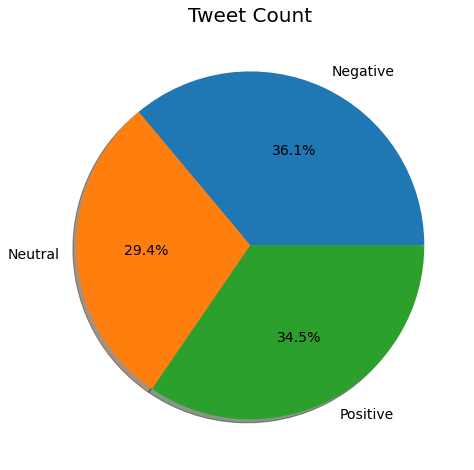

In [ ]:
#Check how the data is distributed

pie_chart(df2)

### Create Training and Testing Sets 

In [ ]:
text=df2['Content'].astype("str")
target=df2['Score'].astype("category")

#80% for Training 20% for Testing

x_train,x_test,y_train,y_test=train_test_split(text,target,test_size=0.2,random_state=25)
print(f"Training Data Points-{len(x_train)} and Testing Data Points-{len(x_test)}")

Training Data Points-2392 and Testing Data Points-598


### Find Suitable Vectorization Method (Count Vectorizer or TFIDF Vectorizer) 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate():

  model_NB= MultinomialNB()
  model_NB.fit(x_train_vectors.toarray(),y_train)
  predictions_NB=model_NB.predict(x_test_vectors.toarray())

  print("Training Accuracy score: "+str(round(accuracy_score(y_train,model_NB.predict(x_train_vectors.toarray())),4)))
  print("Testing Accuracy score: "+str(round(accuracy_score(y_test,predictions_NB),4)))

  cm_NB=confusion_matrix(y_test,predictions_NB)
  print(classification_report(y_test,predictions_NB,target_names=["Negative","Neutral","Positive"]))
  disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_NB,display_labels=["Negative","Neutral","Positive"])
  disp1.plot()

Count Vectorizer
Training Accuracy score: 0.6793
Testing Accuracy score: 0.4916
              precision    recall  f1-score   support

    Negative       0.50      0.46      0.48       209
     Neutral       0.49      0.46      0.47       178
    Positive       0.49      0.55      0.52       211

    accuracy                           0.49       598
   macro avg       0.49      0.49      0.49       598
weighted avg       0.49      0.49      0.49       598

TFIDF Vectorizer
Training Accuracy score: 0.7007
Testing Accuracy score: 0.5
              precision    recall  f1-score   support

    Negative       0.48      0.52      0.50       209
     Neutral       0.52      0.42      0.47       178
    Positive       0.50      0.55      0.52       211

    accuracy                           0.50       598
   macro avg       0.50      0.50      0.50       598
weighted avg       0.50      0.50      0.50       598



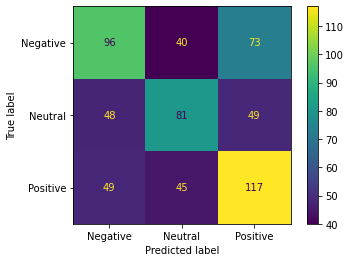

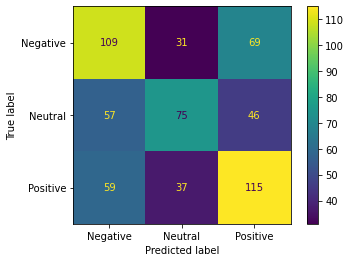

In [ ]:
for i in range(2):
  if i==0:
    print("Count Vectorizer")
    vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=1000,max_df=0.8)
    vectorizing_model=vectorizer.fit(x_train)
    x_train_vectors=vectorizing_model.transform(x_train)
    x_test_vectors=vectorizing_model.transform(x_test)
    evaluate()
  elif i==1:
    print("TFIDF Vectorizer")
    vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=1000,max_df=0.8)
    vectorizing_model=vectorizer.fit(x_train)
    x_train_vectors=vectorizing_model.transform(x_train)
    x_test_vectors=vectorizing_model.transform(x_test)
    evaluate()


### Finding the best Max features for TFID Matrix

Calculating for 1000 features
Size of the Training Input Set (2392, 1000)
Size of the Testing Input Set (598, 1000)
Training Accuracy score: 0.7007
Testing Accuracy score: 0.5
              precision    recall  f1-score   support

    Negative       0.48      0.52      0.50       209
     Neutral       0.52      0.42      0.47       178
    Positive       0.50      0.55      0.52       211

    accuracy                           0.50       598
   macro avg       0.50      0.50      0.50       598
weighted avg       0.50      0.50      0.50       598

Calculating for 10000 features
Size of the Training Input Set (2392, 10000)
Size of the Testing Input Set (598, 10000)
Training Accuracy score: 0.8779
Testing Accuracy score: 0.5468
              precision    recall  f1-score   support

    Negative       0.47      0.69      0.56       209
     Neutral       0.80      0.39      0.53       178
    Positive       0.56      0.53      0.55       211

    accuracy                           0.55

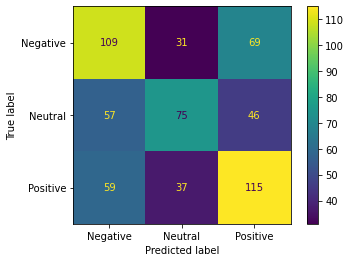

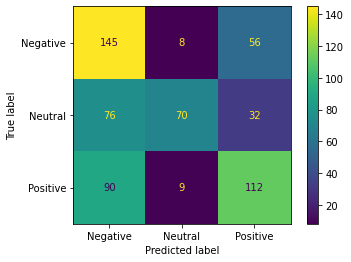

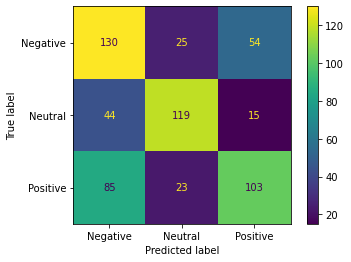

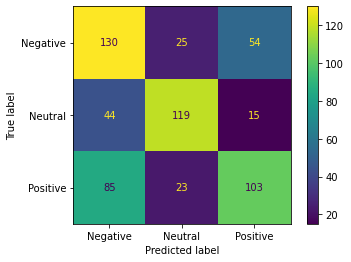

In [ ]:
#Finding the best max_features for TFID MATRIX
for max_f in [1000,10000,100000,1000000]:
  print(f"Calculating for {max_f} features")
  vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=max_f,max_df=0.8)
  vectorizing_model=vectorizer.fit(x_train)
  x_train_vectors=vectorizing_model.transform(x_train)
  x_test_vectors=vectorizing_model.transform(x_test)

  print(f"Size of the Training Input Set {x_train_vectors.shape}")
  print(f"Size of the Testing Input Set {x_test_vectors.shape}")

  from sklearn.naive_bayes import MultinomialNB
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

  model_NB= MultinomialNB()
  model_NB.fit(x_train_vectors.toarray(),y_train)
  predictions_NB=model_NB.predict(x_test_vectors.toarray())

  print("Training Accuracy score: "+str(round(accuracy_score(y_train,model_NB.predict(x_train_vectors.toarray())),4)))
  print("Testing Accuracy score: "+str(round(accuracy_score(y_test,predictions_NB),4)))

  cm_NB=confusion_matrix(y_test,predictions_NB)
  print(classification_report(y_test,predictions_NB,target_names=["Negative","Neutral","Positive"]))
  disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_NB,display_labels=["Negative","Neutral","Positive"])
  disp1.plot()

### Create tfidf Matrix and Convert data to the correct format to feed into the Machine Learning Model

In [ ]:
#Use the Optimed max features value = 100000
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=100000,max_df=0.8)
vectorizing_model=vectorizer.fit(x_train)
x_train_vectors=vectorizing_model.transform(x_train)
x_test_vectors=vectorizing_model.transform(x_test)

In [ ]:
print(f"Size of the Training Input Set {x_train_vectors.shape}")
print(f"Size of the Testing Input Set {x_test_vectors.shape}")


Size of the Training Input Set (2392, 29150)
Size of the Testing Input Set (598, 29150)


In [ ]:
#Save the Vectorizer for fututre Use
joblib.dump(vectorizing_model,"Tweet_Vectorizer")

['Tweet_Vectorizer']

## Building the Models

1. Naive Bayes Algorithm

Training Accuracy score: 0.9561
Testing Accuracy score: 0.5886
              precision    recall  f1-score   support

    Negative       0.50      0.62      0.56       209
     Neutral       0.71      0.67      0.69       178
    Positive       0.60      0.49      0.54       211

    accuracy                           0.59       598
   macro avg       0.60      0.59      0.59       598
weighted avg       0.60      0.59      0.59       598



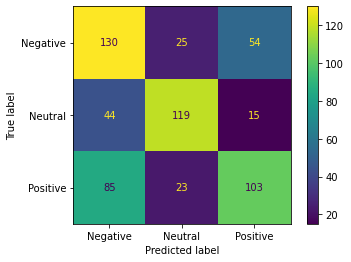

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model_NB= MultinomialNB()
model_NB.fit(x_train_vectors.toarray(),y_train)
predictions_NB=model_NB.predict(x_test_vectors.toarray())

print("Training Accuracy score: "+str(round(accuracy_score(y_train,model_NB.predict(x_train_vectors.toarray())),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,predictions_NB),4)))

cm_NB=confusion_matrix(y_test,predictions_NB)
print(classification_report(y_test,predictions_NB,target_names=["Negative","Neutral","Positive"]))
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_NB,display_labels=["Negative","Neutral","Positive"])
disp1.plot()


2.KNN Algorithm

Training Accuracy score: 0.7232
Testing Accuracy score: 0.4816
              precision    recall  f1-score   support

    Negative       0.46      0.50      0.48       209
     Neutral       0.50      0.53      0.51       178
    Positive       0.49      0.43      0.46       211

    accuracy                           0.48       598
   macro avg       0.48      0.48      0.48       598
weighted avg       0.48      0.48      0.48       598



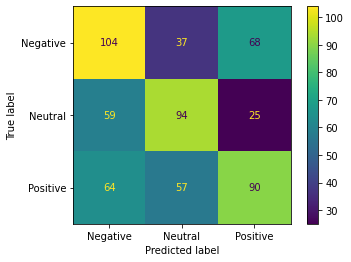

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_neigh = KNeighborsClassifier(n_neighbors=3)
model_neigh.fit(x_train_vectors.toarray(),y_train)
predictions_neigh=model_neigh.predict(x_test_vectors.toarray())

print("Training Accuracy score: "+str(round(accuracy_score(y_train,model_neigh.predict(x_train_vectors.toarray())),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,predictions_neigh),4)))

cm_neigh=confusion_matrix(y_test,predictions_neigh)
print(classification_report(y_test,predictions_neigh,target_names=["Negative","Neutral","Positive"]))

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_neigh,display_labels=["Negative","Neutral","Positive"])
disp2.plot()

In [ ]:
#Save the Model
joblib.dump(model_NB,"Best_model.sav") 

['Best_model.sav']

## Real Time Prediction

### Getting Real-Time Tweets according to the Hashtags


In [ ]:
import tweepy 
from tqdm import tqdm
import re
import datetime

#Twitter API credentials
consumer_key = "vKGMwbp2xKlxaM1kvyWMUTyxx"
consumer_secret = "UAAuvczizcqGqD6A7NcMaM4eemPVumqadT7ZRJsfBS5pEVJiJn"
access_key = "954661768915275776-m8w4eUgc0TLth6h5i9S8iswIiVSFwHx"
access_secret = "lsdKaFayiH1Auik0oi2fOyKusVeiR8uIFW6iecKAOk9Cu"

import datetime 
def get_all_tweets(screen_name):
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)

    alltweets = []  

    new_tweets = api.user_timeline(screen_name = screen_name,count=1000)
    
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1

    while len(new_tweets) > 0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=1000,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text] for tweet in alltweets]
    return outtweets

out=[]
for screen_names in tqdm(["wef"," Bloomberg","markets","FinancialNews","GoldmanSachs","IBDinvestors","nytimesbusiness","FinancialTimes", "TheEconomist","Benzinga","OxfordEconomics","CNBC","CNBCnow","EuropeEconomics","MarketWatch","BBCWorld",]):
  get=get_all_tweets(screen_names)
  print(f"{screen_names} extracted {len(get)} tweets")
  out=out+get

print(f"There are {len(out)} tweets extracted")

  6%|▋         | 1/16 [00:15<03:55, 15.69s/it]

wef extracted 3250 tweets


 12%|█▎        | 2/16 [00:40<04:51, 20.84s/it]

 Bloomberg extracted 3228 tweets


 19%|█▉        | 3/16 [00:57<04:09, 19.16s/it]

markets extracted 3250 tweets


 25%|██▌       | 4/16 [01:12<03:33, 17.76s/it]

FinancialNews extracted 3250 tweets


 31%|███▏      | 5/16 [01:30<03:15, 17.80s/it]

GoldmanSachs extracted 3250 tweets


 38%|███▊      | 6/16 [01:46<02:51, 17.14s/it]

IBDinvestors extracted 3250 tweets


 44%|████▍     | 7/16 [02:03<02:33, 17.08s/it]

nytimesbusiness extracted 3250 tweets


 50%|█████     | 8/16 [02:20<02:14, 16.87s/it]

FinancialTimes extracted 3250 tweets


 56%|█████▋    | 9/16 [02:36<01:56, 16.63s/it]

TheEconomist extracted 3250 tweets


 62%|██████▎   | 10/16 [02:55<01:45, 17.60s/it]

Benzinga extracted 3247 tweets


 69%|██████▉   | 11/16 [03:12<01:26, 17.25s/it]

OxfordEconomics extracted 3249 tweets


 75%|███████▌  | 12/16 [03:30<01:10, 17.62s/it]

CNBC extracted 3250 tweets


 81%|████████▏ | 13/16 [03:47<00:52, 17.47s/it]

CNBCnow extracted 3250 tweets


 88%|████████▊ | 14/16 [03:49<00:25, 12.66s/it]

EuropeEconomics extracted 225 tweets


 94%|█████████▍| 15/16 [04:07<00:14, 14.14s/it]

MarketWatch extracted 3250 tweets


100%|██████████| 16/16 [04:24<00:00, 16.54s/it]

BBCWorld extracted 3250 tweets
There are 48949 tweets extracted


In [ ]:
startDate = datetime.datetime(2021, 1, 1, 12, 00, 00)

T_Text=[]
T_Create=[]
T_id=[]
req_hastags=["usd","eu","economics","inflation","eurjpy","pips","eurjpy","forexsignal", "eurusd", "usdtry", "currency", "stockmarket", "forextrader", "forexmarket", "usd", "euro", "forex", "stockstoby","gbpusd", "dollar" , "market" , "volatility","economy" , "business", "finance" ,"investing",  "usdollar",  "Banks",  "Banking" , "Businessmen", "fluctuation", "bibm" , "currencyexchange" ,"Forex", "covid" ,"money", "news", "investment" , "coronavirus" , "politics", "stocks" ,"bitcoin" ,"entrepreneur", "economia" , "trade" ,"education" , "trading", "usa", "invest", "gdp" , "economist" ,"upsc","wealth", "technology" ,"crypto" ,"success", "trump" ,"pandemic","financialfreedom" , "history", "trader", "lockdown" ,"microeconomics" ,"macroeconomics" ,"investors" ,"realestate", "capitalism" ,"entrepreneurship","nifty", "world", "government", "cryptocurrency", "startup","gold","marketing","stockmarket","investing","trading","invest","sharemarket","daytrader","stock","wallstreet","nse","forextrader","bse","daytrading","stockmarketnews","forextrading","innovation","behaviouraleconomics","healtheconomics","economics_news","innovation","behaviouraleconomics","healtheconomics","economics_news "]

for i in range(len(out)):
  twts=out[i][2]
  hashtags=re.findall(r"#(\w+)",twts)
  dte=out[i][1]

  if dte > startDate:
    for j in hashtags:
      if j.lower().strip() in req_hastags:
        T_id.append(out[i][0])
        T_Create.append(out[i][1])
        T_Text.append(out[i][2])
        break

data_tweets=pd.DataFrame(list(zip(T_id,T_Create,T_Text)),columns=["id","created_at","text"])
print(f"There are {len(data_tweets)} tweets filtered in finance sector")

There are 755 tweets filtered in finance sector


In [ ]:
#Getting Predictions
#Libraries
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
import joblib
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [ ]:
vectorizing_model = joblib.load("/content/Tweet_Vectorizer") 
GS_model=joblib.load("/content/Best_model.sav") 

In [ ]:
##Function to clean tweets

stopwords_list = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
punctuations='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
lst=list(punctuations)

def remove_unwanted(review):
    splitReview = review.split()
    splitReview = [word for word in splitReview if not word in stopwords_list] #Remove unwanted words
    splitReview = [lemmatizer.lemmatize(word) for word in splitReview]  #Change the tense of the word
    splitReview = [porter_stemmer.stem(word) for word in splitReview]  #Remove stemming
    clean_review = ' '.join(splitReview)
    return clean_review

def clean_text(text):
    text=text.lower()
    for i in lst:
        text = text.replace(i,'')
    clean_text= remove_unwanted(text)
    return clean_text

In [ ]:
All_prds=[]

predict_labels={0:"Negative Review",1:"Neutral Review",2:"Positive Review"}
for idx in range(len(data_tweets)):
  cont=data_tweets.iloc[idx,2]
  comment=cont.split('https')[0].strip()
  comment_clean=clean_text(comment)
  vectorized_comment=vectorizing_model.transform([comment_clean])
  prd=GS_model.predict(vectorized_comment)
  All_prds.append(predict_labels[prd[0]])

  print(f"Tweet:{comment}")
  print(f"Prediction: {predict_labels[prd[0]]}\n")


Tweet:Tough times ahead for the global economy, say experts #wef22 #Economy
Prediction: Negative Review

Tweet:Cost of living crisis: 1 in 4 people in the developed world struggling, poll shows #Finance #Economy #wef22 @Ipsos
Prediction: Negative Review

Tweet:GDP: What is it and why does it matter? #wef22 #economy #gdp
Prediction: Positive Review

Tweet:Global debt has risen to dangerous levels. Here’s what needs to be done  #economy #global #wef22
Prediction: Negative Review

Tweet:From drones to data: New innovations are supporting Africa's health systems #Africa #Innovation
Prediction: Positive Review

Tweet:COVID-19: What you need to know about the #coronavirus pandemic #COVID19
Prediction: Negative Review

Tweet:US Fed makes biggest interest rate hike in 22 years: Top #economics stories to read this week…
Prediction: Negative Review

Tweet:4 things you need to know about the metaverse this week
Prediction: Negative Review

Tweet:COVID-19: What you need to know about the #coronavi

In [ ]:
#Final Prediction Dataframe
data_tweets["Sentiment"]=All_prds
data_tweets.head(10)

,id,created_at,text,Sentiment
0,1528752033188175880,2022-05-23 14:57:42,"Tough times ahead for the global economy, say ...",Negative Review
1,1528720435134734338,2022-05-23 12:52:08,Cost of living crisis: 1 in 4 people in the de...,Negative Review
2,1527230463630245891,2022-05-19 10:11:31,GDP: What is it and why does it matter? #wef22...,Positive Review
3,1525127122309742593,2022-05-13 14:53:36,Global debt has risen to dangerous levels. Her...,Negative Review
4,1523686339182723073,2022-05-09 15:28:26,From drones to data: New innovations are suppo...,Positive Review
5,1523679366395228161,2022-05-09 15:00:44,COVID-19: What you need to know about the #cor...,Negative Review
6,1522622270119809024,2022-05-06 17:00:12,US Fed makes biggest interest rate hike in 22 ...,Negative Review
7,1521867539277664264,2022-05-04 15:01:10,4 things you need to know about the metaverse ...,Negative Review
8,1521535281517711360,2022-05-03 17:00:54,COVID-19: What you need to know about the #cor...,Negative Review
9,1520480869403795457,2022-04-30 19:11:03,US heading for recession? The #economics stori...,Positive Review
